<a href="https://colab.research.google.com/github/jonkrohn/pytorch/blob/master/shallow_net_in_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Shallow Neural Network in PyTorch

_Remember to change your Runtime type to GPU or TPU_

#### Load dependencies

In [0]:
import torch
import torch.nn as nn

from torchvision.datasets import MNIST
from torchvision import transforms

from torchsummary import summary

import matplotlib.pyplot as plt

#### Load data

In [0]:
train = MNIST('data', train=True, transform=transforms.ToTensor(), download=True)
test = MNIST('data', train=False, transform=transforms.ToTensor())
# toTensor() scales pixels from [0, 255] to [0, 1]

In [3]:
train.data.shape

torch.Size([60000, 28, 28])

In [4]:
train.data[0] # not scaled! 

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

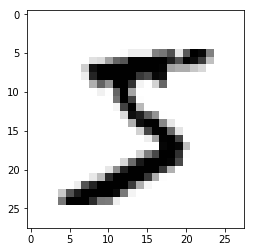

In [5]:
plt.imshow(train.data[0].numpy().squeeze(), cmap='gray_r')

In [6]:
train.targets[0:100]

tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1,
        1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9, 3, 9, 8, 5,
        9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5, 6, 1, 0, 0, 1, 7,
        1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9, 0, 4, 6, 7, 4, 6, 8, 0,
        7, 8, 3, 1])

In [7]:
train.targets.shape

torch.Size([60000])

In [8]:
test.data.shape

torch.Size([10000, 28, 28])

In [9]:
test.targets.shape

torch.Size([10000])

#### Batch training data

In [0]:
train_loader = torch.utils.data.DataLoader(train, batch_size=128) 
# DataLoader() can also shuffle, sample, and run multithreaded over a set number of workers

In [0]:
X_sample, y_sample = iter(train_loader).next()

In [12]:
X_sample.shape

torch.Size([128, 1, 28, 28])

In [13]:
y_sample.shape

torch.Size([128])

In [14]:
y_sample

tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1,
        1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9, 3, 9, 8, 5,
        9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5, 6, 1, 0, 0, 1, 7,
        1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9, 0, 4, 6, 7, 4, 6, 8, 0,
        7, 8, 3, 1, 5, 7, 1, 7, 1, 1, 6, 3, 0, 2, 9, 3, 1, 1, 0, 4, 9, 2, 0, 0,
        2, 0, 2, 7, 1, 8, 6, 4])

In [15]:
X_sample[0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [0]:
X_flat_sample = X_sample.view(X_sample.shape[0], -1) # view() reshapes Tensor (confusingly)

In [17]:
X_flat_sample.shape

torch.Size([128, 784])

In [18]:
X_flat_sample[0]

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 

#### Design neural network architecture

In [0]:
n_input = 784
n_dense = 64
n_out = 10

In [0]:
model = nn.Sequential(
    nn.Linear(n_input, n_dense),
    nn.Sigmoid(),
    nn.Linear(n_dense, n_out)
)

In [21]:
summary(model, (1, n_input))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 1, 64]          50,240
           Sigmoid-2                [-1, 1, 64]               0
            Linear-3                [-1, 1, 10]             650
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.19
Estimated Total Size (MB): 0.20
----------------------------------------------------------------


#### Configure training hyperparameters

In [0]:
cost_fxn = nn.CrossEntropyLoss() 
# includes softmax activation

In [0]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

#### Train

In [24]:
steps_per_epoch = len(train_loader)
steps_per_epoch

469

In [30]:
cost_list = [] # TO DO: accumulate cost instead
acc_list = [] # TO DO: ditto

n_epochs = 1 # TO DO: 200 epochs
print('Training for {} epochs.'.format(n_epochs))

for epoch in range(n_epochs):
  for i, (X, y) in enumerate(train_loader): # enumerate() provides count of iterations
    
    # set gradients of learning to zero:
    optimizer.zero_grad()
    
    # forward propagation:
    X_flat = X.view(X.shape[0], -1)
    y_hat = model(X_flat)
    cost = cost_fxn(y_hat, y)
    cost_list.append(cost.item())
    
    # backprop and optimization via gradient descent: 
    cost.backward()
    optimizer.step()
    
    # calculate accuracy metric:
    total = y.shape[0] 
    _, prediction = torch.max(y_hat, 1) # returns values, indices
    correct = (prediction == y).sum().item()
    pct_correct = (correct / total) * 100.0
    acc_list.append(pct_correct)
    
  # test model:
  # TO DO
    
  
  print('Epoch {}, Cost: {:.3f}, Acc: {:.1f}%'.format(epoch + 1, cost.item(), pct_correct)) 
  # TO DO: add test metrics

Training for 1 epochs.
Epoch 1, Cost: 2.039, Acc: 64.6%
